# Data mining em base de dados públicas usando Jupyter Notebook
Fork baseado no excelente artigo [Data Mining em base de dados públicas usando Jupyter Notebook](https://movile.blog/data-mining-em-bases-de-dados-publicas-usando-jupyter-notebook/), do Christian Janiake.

Aplica conhecimentos de enriquecimento de dados, visualização de dados usando Pandas (biblioteca Python para manipulação de dados).

## Carregando o PIB dos munícipios
Vamos começar importando todas as libs que vamos precisar e carregar um *Dataframe* com os dados do Produto Interno Bruto dos Municípios, entre 2010 e 2015, disponibilizados pelo IBGE.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import seaborn as sns


*Dataframes* são obtidos através de algum dos métodos read (read_csv, read_json, read_excel, read_sql, etc), são combinados com concatenação, join ou merge, agrupados, pivotados, gerando novos *Dataframes*. Podem igualmente ser exportados para os diversos métodos to (to_csv, to_json, to_html, to_excel, to_sql, etc).

> ```python
> pandas.read_fwf(filepath, colspecs='infer', widths=None, **kwds)
> ```
> *Read a table of fixed-width formatted lines into Dataframe*

Podemos aplicar filtros usando expressões lógicas:

In [57]:
df_pib = pd.read_fwf('pib_municipios_2010-2015.txt', 
            colspecs=[(0, 4),(5, 7),(8, 33),(34, 41),(42, 82),(83, 193),(194, 198),
                      (199, 239),(240, 245),(246, 286),(287, 305),(306, 324),
                      (325, 343),(344, 362),(363, 381),(382, 400),(401, 419),
                      (420, 438),(439, 457),(458, 552),(553, 647),(648, 741)],
            names=['Ano','CodUF','NomeUF','CodMunicipio','NomeMunicipio','RegiaoMetropolitana','CodMeso','NomeMeso','CodMicro',
                   'NomeMicro','ValAgropecuaria','ValIndustria','ValServicos','ValAdministracao','ValTotal','Impostos','PIB',
                   'Populacao','PIBperCapita','Atividade1','Atividade2','Atividade3'],
            encoding='iso-8859-1')


In [154]:
minha_cidade = 'Jaraguá do Sul'
df_pib[df_pib.NomeMunicipio == minha_cidade]

,Ano,CodUF,NomeUF,CodMunicipio,NomeMunicipio,RegiaoMetropolitana,CodMeso,NomeMeso,CodMicro,NomeMicro,...,ValServicos,ValAdministracao,ValTotal,Impostos,PIB,Populacao,PIBperCapita,Atividade1,Atividade2,Atividade3
4443,2010,42,Santa Catarina,4208906,Jaraguá do Sul,RM Norte/Nordeste Catarinense,4202,Norte Catarinense,42008,Joinville,...,1787646.691,405696.709,4766860.722,748945.197,5515805.918,143206,38516.58,Indústrias de transformação,Demais serviços,Comércio e reparação de veículos automotores e...
10008,2011,42,Santa Catarina,4208906,Jaraguá do Sul,RM Norte/Nordeste Catarinense,4202,Norte Catarinense,42008,Joinville,...,1961322.068,482304.729,5669660.703,877167.927,6546828.630,145782,44908.35,Indústrias de transformação,Demais serviços,"Administração, defesa, educação e saúde públic..."
15573,2012,42,Santa Catarina,4208906,Jaraguá do Sul,RM Norte/Nordeste Catarinense,4202,Norte Catarinense,42008,Joinville,...,2135663.277,537223.845,5918110.378,926851.618,6844961.996,148353,46139.69,Indústrias de transformação,Demais serviços,"Administração, defesa, educação e saúde públic..."
21139,2013,42,Santa Catarina,4208906,Jaraguá do Sul,RM Norte/Nordeste Catarinense,4202,Norte Catarinense,42008,Joinville,...,2407566.703,629641.921,6682769.833,1100141.632,7782911.465,156519,49725.03,Indústrias de transformação,Demais serviços,"Administração, defesa, educação e saúde públic..."
26709,2014,42,Santa Catarina,4208906,Jaraguá do Sul,RM Norte/Nordeste Catarinense,4202,Norte Catarinense,42008,Joinville,...,2619199.214,707720.680,5986388.591,1069267.511,7055656.102,160143,44058.47,Indústrias de transformação,Demais serviços,"Administração, defesa, educação e saúde públic..."
32279,2015,42,Santa Catarina,4208906,Jaraguá do Sul,RM Norte/Nordeste Catarinense,4202,Norte Catarinense,42008,Joinville,...,2623884.052,772790.162,5493473.627,1138513.254,6631986.881,163735,40504.39,Demais serviços,Indústrias de transformação,"Administração, defesa, educação e saúde públic..."


### Encadeando operações

Como cada operação retorna um Dataframe, podemos encadear diversas operações em sequência: 
>Análise: *Como ocorre na maioria das cidades do país, o PIB de Jaraguá do Sul retraiu a partir de 2014*

In [155]:
(df_pib[df_pib.NomeMunicipio == minha_cidade][['NomeMunicipio','Ano','PIB']]
     .join(df_pib[df_pib.NomeMunicipio == minha_cidade]['PIB'].pct_change() * 100, rsuffix='_varYOY')
     .join(df_pib[df_pib.NomeMunicipio == minha_cidade].PIB / df_pib[df_pib.NomeMunicipio == minha_cidade].PIB.values[0] * 100, rsuffix='_var2010'))

,NomeMunicipio,Ano,PIB,PIB_varYOY,PIB_var2010
4443,Jaraguá do Sul,2010,5515805.918,NaN,100.000000
10008,Jaraguá do Sul,2011,6546828.630,18.692150,118.692150
15573,Jaraguá do Sul,2012,6844961.996,4.553859,124.097223
21139,Jaraguá do Sul,2013,7782911.465,13.702771,141.101982
26709,Jaraguá do Sul,2014,7055656.102,-9.344258,127.917048
32279,Jaraguá do Sul,2015,6631986.881,-6.004675,120.236045


Text(2014.3,122,'Jaraguá do Sul')

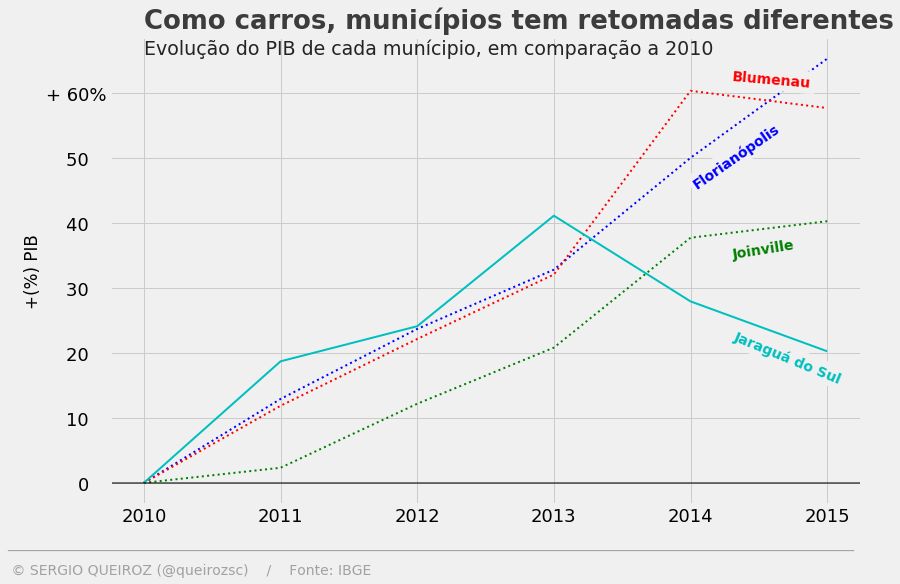

In [267]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12,8))
ax = plt.axes()
x = df_pib[df_pib.NomeMunicipio == minha_cidade].Ano

cidades = {'Florianópolis': ':b', 
           'Joinville': ':g', 
           'Blumenau': ':r', 
           'Jaraguá do Sul': '-c'}

for cidade in cidades:
    plt.plot(x, df_pib[df_pib.NomeMunicipio == cidade].PIB / df_pib[df_pib.NomeMunicipio == cidade].PIB.values[0] * 100, cidades[cidade], label=cidade, linewidth=2)

#Style the graph
plt.ylabel('+(%) PIB')
plt.tick_params(axis='both', which='major', labelsize=18) #increase the font size of all the major tick labels
ax.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50   ', '+ 60%']) #customize the tick labels of the y-axis
plt.axhline(y = 100, color = 'black', linewidth = 1.5, alpha = .7) #generate a bolded horizontal line at y=100
#plt.legend()
#title + subtitle
plt.text(x = 2010, y = 170, s = "Como carros, municípios tem retomadas diferentes",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 2010, y = 166, 
               s = 'Evolução do PIB de cada munícipio, em comparação a 2010',
              fontsize = 19, alpha = .85)
#signature
plt.text(x = 2009, y = 90,
    s = '_________________________________________________________________________________________________________________________',
    color = 'grey', alpha = .7)

plt.text(x = 2009, y = 86,
    s = ' © SERGIO QUEIROZ (@queirozsc)    /    Fonte: IBGE',
    fontsize = 14, color = 'grey', alpha = .7)
#colored labels
plt.text(x = 2014, y = 154, s = 'Florianópolis', color = 'b', weight = 'bold', rotation = 35,
              backgroundcolor = '#f0f0f0')
plt.text(x = 2014.3, y = 136, s = 'Joinville', color = 'g', weight = 'bold', rotation = 9,
              backgroundcolor = '#f0f0f0')
plt.text(x = 2014.3, y = 162, s = 'Blumenau', color = 'r', weight = 'bold', rotation = -5,
              backgroundcolor = '#f0f0f0')
plt.text(x = 2014.3, y = 122, s = 'Jaraguá do Sul', color = 'c', weight = 'bold', rotation = -22.5,
              backgroundcolor = '#f0f0f0')

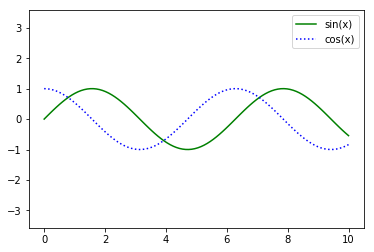

In [65]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

## Carregando dados cartográficos

Agora vamos carregar outro *Dataframe* com dados de DDD (discagem direta a distância), latitude e longitude dos municípios.

> ```python
> pandas.read_csv(filepath, delimiter=None, names=None)
> ```
> *Read CSV (comma-separated) into Dataframe*

In [45]:
df_ddd = pd.read_csv('ibge_city.csv', delimiter='\t', 
                     names=['id','id_state','title','iso','DDD','population','lat','lng','created_at','updated_at','status'])

### Combinando Dataframes

Vamos combinar os dois *Dataframes*. O campo **CodMunicipio** do primeiro equivale ao campo **iso** do segundo:

In [52]:
df_pib2015 = df_pib[df_pib.Ano == 2015]
df_pib = df_pib2015.merge(df_ddd, left_on='CodMunicipio', right_on='iso')
print(df_pib.NomeMunicipio.value_counts())
df_pib.columns


São Domingos                5
Bom Jesus                   5
Planalto                    4
São Francisco               4
Santa Luzia                 4
Santa Helena                4
Vera Cruz                   4
Santa Inês                  4
Bonito                      4
Jussara                     3
Água Branca                 3
Itambé                      3
Novo Horizonte              3
Bom Sucesso                 3
Viçosa                      3
Triunfo                     3
Cantagalo                   3
Cruzeiro do Sul             3
Alto Alegre                 3
Bom Jardim                  3
Santa Cruz                  3
Boa Esperança               3
Ouro Branco                 3
Cachoeirinha                3
Nova Olinda                 3
Belém                       3
Mundo Novo                  3
Santa Terezinha             3
Palmas                      2
Nova União                  2
                           ..
Francisco Sá                1
Serranópolis do Iguaçu      1
Andradina 

Index(['Ano', 'CodUF', 'NomeUF', 'CodMunicipio', 'NomeMunicipio',
       'RegiaoMetropolitana', 'CodMeso', 'NomeMeso', 'CodMicro', 'NomeMicro',
       'ValAgropecuaria', 'ValIndustria', 'ValServicos', 'ValAdministracao',
       'ValTotal', 'Impostos', 'PIB', 'Populacao', 'PIBperCapita',
       'Atividade1', 'Atividade2', 'Atividade3', 'id_x', 'id_state_x',
       'title_x', 'iso_x', 'DDD_x', 'population_x', 'lat_x', 'lng_x',
       'created_at_x', 'updated_at_x', 'status_x', 'id_y', 'id_state_y',
       'title_y', 'iso_y', 'DDD_y', 'population_y', 'lat_y', 'lng_y',
       'created_at_y', 'updated_at_y', 'status_y'],
      dtype='object')

In [9]:
# Os maiores Estados UF por numero de municipios
df_pib.CodUF.value_counts()

31    853
35    645
43    497
29    417
41    399
42    295
52    246
22    224
25    223
21    217
26    185
23    184
24    167
15    144
51    141
17    139
27    102
33     92
50     79
32     78
28     75
13     62
11     52
12     22
16     16
14     15
53      1
Name: CodUF, dtype: int64

In [10]:
# Os maiores DDDs por numero de municipios
df_pib.DDD.value_counts()

83    223
33    177
84    167
55    160
35    159
51    157
54    155
49    151
75    143
88    141
89    140
63    139
31    135
62    133
38    129
44    123
32    122
17    117
98    115
77    108
18    108
82    102
64    102
99    102
14    100
81     98
43     97
66     92
73     91
87     87
     ... 
34     70
48     67
11     64
37     61
74     60
42     57
69     51
27     51
65     49
15     49
46     44
85     43
22     43
45     41
12     38
97     38
94     37
41     36
28     27
93     26
24     26
53     25
92     24
21     23
13     22
68     22
96     16
95     16
71     15
61     12
Name: DDD, Length: 67, dtype: int64

In [55]:
df_pib[df_pib.DDD_x == 47].loc[:,['NomeMunicipio','population','ValTotal','lat','lng']].sort_values('population', ascending=False).head()

/home/queiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/home/queiroz/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,NomeMunicipio,population,ValTotal,lat,lng
4313,Agrolândia,NaN,221965.487,NaN,NaN
4314,Agronômica,NaN,120739.754,NaN,NaN
4326,Apiúna,NaN,339305.981,NaN,NaN
4328,Araquari,NaN,1955279.824,NaN,NaN
4333,Ascurra,NaN,139307.820,NaN,NaN


In [12]:
#pib.columns
ddd = df_pib.groupby('DDD').sum()
ddd

,Ano,CodUF,CodMunicipio,CodMeso,CodMicro,ValAgropecuaria,ValIndustria,ValServicos,ValAdministracao,ValTotal,...,PIB,Populacao,PIBperCapita,id,id_state,iso,population,lat,lng,status
DDD,,,,,,,,,,,,,,,,,,,,,
11,128960,2240,225821101,224876,2243483,2.729874e+06,1.580093e+08,7.010595e+08,8.130220e+07,9.431008e+08,...,1.149612e+09,22820740,2580499.52,229465,1664,225821101,22820740,-1496.973332,-2987.082294,64
12,76570,1330,134161325,133494,1331954,3.815685e+05,3.586317e+07,4.261685e+07,9.244545e+06,8.810613e+07,...,1.024392e+08,2444038,1042863.29,137120,988,134161325,2444038,-873.633003,-1720.996480,38
13,44330,770,77616310,77314,771263,7.909778e+05,1.539868e+07,3.562440e+07,9.162855e+06,6.097691e+07,...,6.865568e+07,2069370,747942.55,78774,572,77616310,2069370,-535.351438,-1038.855109,22
14,201500,3500,352542855,350640,3502851,3.873883e+06,1.464105e+07,3.459142e+07,8.793913e+06,6.190027e+07,...,6.834688e+07,2409560,2334340.27,355167,2600,352542855,2409560,-2249.842361,-4930.937585,100
15,98735,1715,172837301,172045,1717108,4.147882e+06,1.703540e+07,2.922869e+07,7.481444e+06,5.789342e+07,...,6.777130e+07,2050775,1094496.53,175060,1274,172837301,2050775,-1164.864983,-2365.985493,49
16,149110,2590,261227144,259205,2591161,3.470464e+06,2.163839e+07,5.216103e+07,1.134300e+07,8.861288e+07,...,9.902560e+07,3053447,2171193.37,266648,1924,261227144,3053447,-1564.482527,-3550.398870,74
17,235755,4095,413065913,409627,4095522,3.436767e+06,1.085957e+07,3.000644e+07,7.528740e+06,5.183152e+07,...,5.677553e+07,2001763,2826178.17,422134,3042,413065913,2001763,-2414.248978,-5818.057940,117
18,217620,3780,381093752,378701,3783160,3.949712e+06,1.039578e+07,2.507000e+07,7.192686e+06,4.660818e+07,...,5.060711e+07,1920240,2645087.79,387450,2808,381093752,1920240,-2348.832715,-5513.745610,108
19,147095,2555,257644432,255985,2557174,3.527665e+06,7.280829e+07,1.286334e+08,2.199285e+07,2.269622e+08,...,2.766566e+08,5626551,3119836.34,262442,1898,257644432,5626551,-1635.561766,-3445.940107,73


In [13]:
ddd = ddd.loc[:,['ValAgropecuaria','ValIndustria','ValServicos','ValAdministracao','ValTotal','Impostos','PIB','Populacao']]
ddd = ddd.join(df_pib.groupby('DDD').mean().loc[:,['lat','lng']])
ddd['Agropecuaria'] = ddd.ValAgropecuaria / ddd.ValTotal
ddd['Industria'] = ddd.ValIndustria / ddd.ValTotal
ddd['Servicos'] = ddd.ValServicos / ddd.ValTotal
ddd['SetorPublico'] = ddd.ValAdministracao / ddd.ValTotal
ddd

,ValAgropecuaria,ValIndustria,ValServicos,ValAdministracao,ValTotal,Impostos,PIB,Populacao,lat,lng,Agropecuaria,Industria,Servicos,SetorPublico
DDD,,,,,,,,,,,,,,
11,2.729874e+06,1.580093e+08,7.010595e+08,8.130220e+07,9.431008e+08,2.065113e+08,1.149612e+09,22820740,-23.390208,-46.673161,0.002895,0.167542,0.743356,0.086207
12,3.815685e+05,3.586317e+07,4.261685e+07,9.244545e+06,8.810613e+07,1.433306e+07,1.024392e+08,2444038,-22.990342,-45.289381,0.004331,0.407045,0.483699,0.104925
13,7.909778e+05,1.539868e+07,3.562440e+07,9.162855e+06,6.097691e+07,7.678771e+06,6.865568e+07,2069370,-24.334156,-47.220687,0.012972,0.252533,0.584228,0.150268
14,3.873883e+06,1.464105e+07,3.459142e+07,8.793913e+06,6.190027e+07,6.446611e+06,6.834688e+07,2409560,-22.498424,-49.309376,0.062583,0.236526,0.558825,0.142066
15,4.147882e+06,1.703540e+07,2.922869e+07,7.481444e+06,5.789342e+07,9.877885e+06,6.777130e+07,2050775,-23.772755,-48.285418,0.071647,0.294254,0.504871,0.129228
16,3.470464e+06,2.163839e+07,5.216103e+07,1.134300e+07,8.861288e+07,1.041272e+07,9.902560e+07,3053447,-21.141656,-47.978363,0.039164,0.244190,0.588639,0.128006
17,3.436767e+06,1.085957e+07,3.000644e+07,7.528740e+06,5.183152e+07,4.944016e+06,5.677553e+07,2001763,-20.634607,-49.726991,0.066307,0.209517,0.578923,0.145254
18,3.949712e+06,1.039578e+07,2.507000e+07,7.192686e+06,4.660818e+07,3.998929e+06,5.060711e+07,1920240,-21.748451,-51.053200,0.084743,0.223046,0.537888,0.154322
19,3.527665e+06,7.280829e+07,1.286334e+08,2.199285e+07,2.269622e+08,4.969438e+07,2.766566e+08,5626551,-22.404956,-47.204659,0.015543,0.320795,0.566761,0.096901


In [14]:
ddd = ddd.loc[:,'PIB':]
ddd

,PIB,Populacao,lat,lng,Agropecuaria,Industria,Servicos,SetorPublico
DDD,,,,,,,,
11,1.149612e+09,22820740,-23.390208,-46.673161,0.002895,0.167542,0.743356,0.086207
12,1.024392e+08,2444038,-22.990342,-45.289381,0.004331,0.407045,0.483699,0.104925
13,6.865568e+07,2069370,-24.334156,-47.220687,0.012972,0.252533,0.584228,0.150268
14,6.834688e+07,2409560,-22.498424,-49.309376,0.062583,0.236526,0.558825,0.142066
15,6.777130e+07,2050775,-23.772755,-48.285418,0.071647,0.294254,0.504871,0.129228
16,9.902560e+07,3053447,-21.141656,-47.978363,0.039164,0.244190,0.588639,0.128006
17,5.677553e+07,2001763,-20.634607,-49.726991,0.066307,0.209517,0.578923,0.145254
18,5.060711e+07,1920240,-21.748451,-51.053200,0.084743,0.223046,0.537888,0.154322
19,2.766566e+08,5626551,-22.404956,-47.204659,0.015543,0.320795,0.566761,0.096901


In [15]:
perctot = df_pib.groupby('DDD')['PIB','Populacao'].sum().apply(lambda x: x / x.sum())
perctot.columns = ['%PIB', '%Pop']
ddd = ddd.join(perctot)
perctot

,%PIB,%Pop
DDD,,
11,0.191737,0.111602
12,0.017085,0.011952
13,0.011451,0.010120
14,0.011399,0.011784
15,0.011303,0.010029
16,0.016516,0.014933
17,0.009469,0.009789
18,0.008440,0.009391
19,0.046142,0.027516


In [16]:
ddd['PerCapita'] = ddd['PIB'] / ddd['Populacao']
#ddd.to_csv('/tmp/ddd.csv')
ddd

,PIB,Populacao,lat,lng,Agropecuaria,Industria,Servicos,SetorPublico,%PIB,%Pop,PerCapita
DDD,,,,,,,,,,,
11,1.149612e+09,22820740,-23.390208,-46.673161,0.002895,0.167542,0.743356,0.086207,0.191737,0.111602,50.375762
12,1.024392e+08,2444038,-22.990342,-45.289381,0.004331,0.407045,0.483699,0.104925,0.017085,0.011952,41.913913
13,6.865568e+07,2069370,-24.334156,-47.220687,0.012972,0.252533,0.584228,0.150268,0.011451,0.010120,33.177095
14,6.834688e+07,2409560,-22.498424,-49.309376,0.062583,0.236526,0.558825,0.142066,0.011399,0.011784,28.364879
15,6.777130e+07,2050775,-23.772755,-48.285418,0.071647,0.294254,0.504871,0.129228,0.011303,0.010029,33.046680
16,9.902560e+07,3053447,-21.141656,-47.978363,0.039164,0.244190,0.588639,0.128006,0.016516,0.014933,32.430759
17,5.677553e+07,2001763,-20.634607,-49.726991,0.066307,0.209517,0.578923,0.145254,0.009469,0.009789,28.362765
18,5.060711e+07,1920240,-21.748451,-51.053200,0.084743,0.223046,0.537888,0.154322,0.008440,0.009391,26.354576
19,2.766566e+08,5626551,-22.404956,-47.204659,0.015543,0.320795,0.566761,0.096901,0.046142,0.027516,49.169834


/home/christian.janiake/anaconda3/envs/mssql/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/christian.janiake/anaconda3/envs/mssql/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/christian.janiake/anaconda3/envs/mssql/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


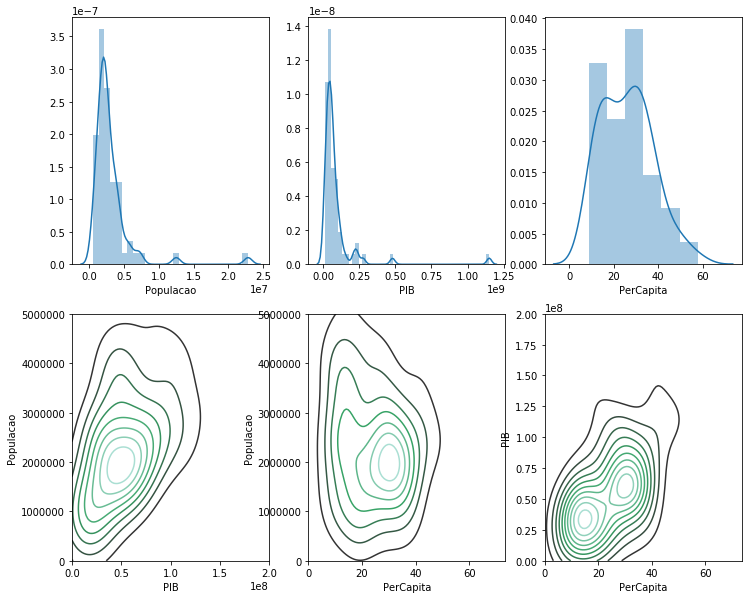

In [17]:
#DEMORADO

#histogramas distribuicao populacao, etc.
plt.close()
fig, ax = plt.subplots(2, 3, figsize=(12, 10))
sns.distplot(ddd['Populacao'], ax=ax[0, 0])
sns.distplot(ddd['PIB'], ax=ax[0, 1])
sns.distplot(ddd['PerCapita'], ax=ax[0, 2])
sns.kdeplot(ddd['PIB'], ddd['Populacao'], ax=ax[1, 0], clip=((0,2e8),(0,5e6)))
sns.kdeplot(ddd['PerCapita'], ddd['Populacao'], ax=ax[1, 1], clip=(0,5e6))
sns.kdeplot(ddd['PerCapita'], ddd['PIB'], ax=ax[1, 2], clip=(0,2e8))
plt.show()


#for x in groupby_ddd[['%PIB','%Pop']]:
#    print(x)

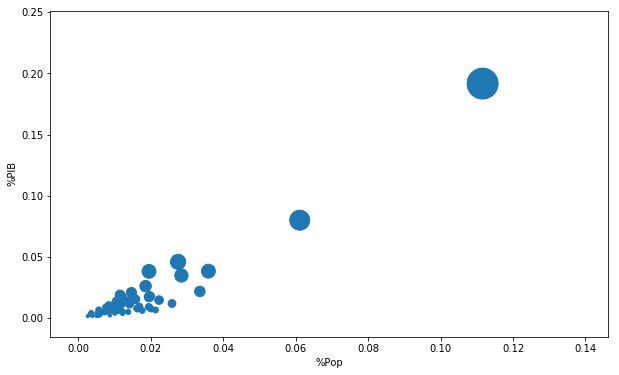

In [18]:
# mostrar distribuição %PIB x %População

plt.close()
plt.rcParams['figure.figsize'] = 10, 6
ddd.plot('%Pop', '%PIB', kind='scatter', s=ddd['%PIB'] * 5000)
#ddd.plot.hexbin('%Pop', '%PIB', gridsize=(15, 10))

#ddd.sort_values('%PIB', ascending=False).iloc[0:8]
plt.show()

In [19]:
tmpbypib = ddd.sort_values('PIB', ascending=False)
tmptab = pd.DataFrame(tmpbypib[['PIB']])
tmptab['Acum'] = pd.Series(np.cumsum(tmptab.PIB))
tmptab['%PIB'] = tmpbypib[['%PIB']]
tmptab['%Acum'] = pd.Series(np.cumsum(tmptab['%PIB']))
tmptab

,PIB,Acum,%PIB,%Acum
DDD,,,,
11,1.149612e+09,1.149612e+09,0.191737,0.191737
21,4.807987e+08,1.630411e+09,0.080189,0.271926
19,2.766566e+08,1.907067e+09,0.046142,0.318068
31,2.313254e+08,2.138393e+09,0.038581,0.356649
61,2.301731e+08,2.368566e+09,0.038389,0.395038
51,2.099551e+08,2.578521e+09,0.035017,0.430055
41,1.578858e+08,2.736407e+09,0.026333,0.456388
81,1.319751e+08,2.868382e+09,0.022011,0.478400
47,1.263157e+08,2.994698e+09,0.021067,0.499467


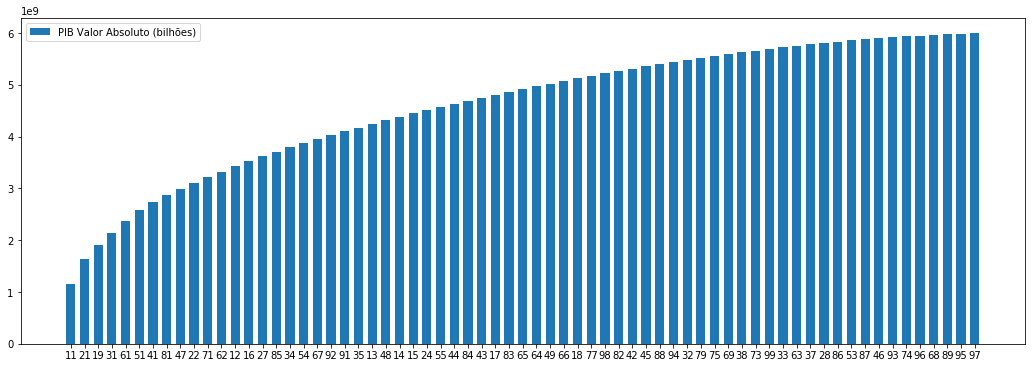

In [20]:
# mostrar o acumulado dos DDDs para PIB e Populacao

import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    n = len(data)            # Number of data points: n
    x = np.cumsum(np.sort(data)[::-1])  # x-data for the ECDF: x
    y = np.arange(1, n+1) / n    # y-data for the ECDF: y
    return x, y

rcParams['figure.figsize'] = 18, 6

plt.close()

#ax.scatter(ecdf(ddd['PIB'])[1], ecdf(ddd['PIB'])[0], label='PIB', marker='.')
#plt.ylim(ymin=0)

idxs = pd.Series(tmptab.index.values, dtype=str)
plt.bar(ecdf(ddd['PIB'])[1], ecdf(ddd['PIB'])[0], 0.01, label='PIB Valor Absoluto (bilhões)', tick_label=idxs)
#plt.bar(tmptab['Populacao'], ecdf(ddd['Populacao'])[0], 0.01, label='Populacao (bilhões)', tick_label=idxs)
plt.legend()
plt.show()


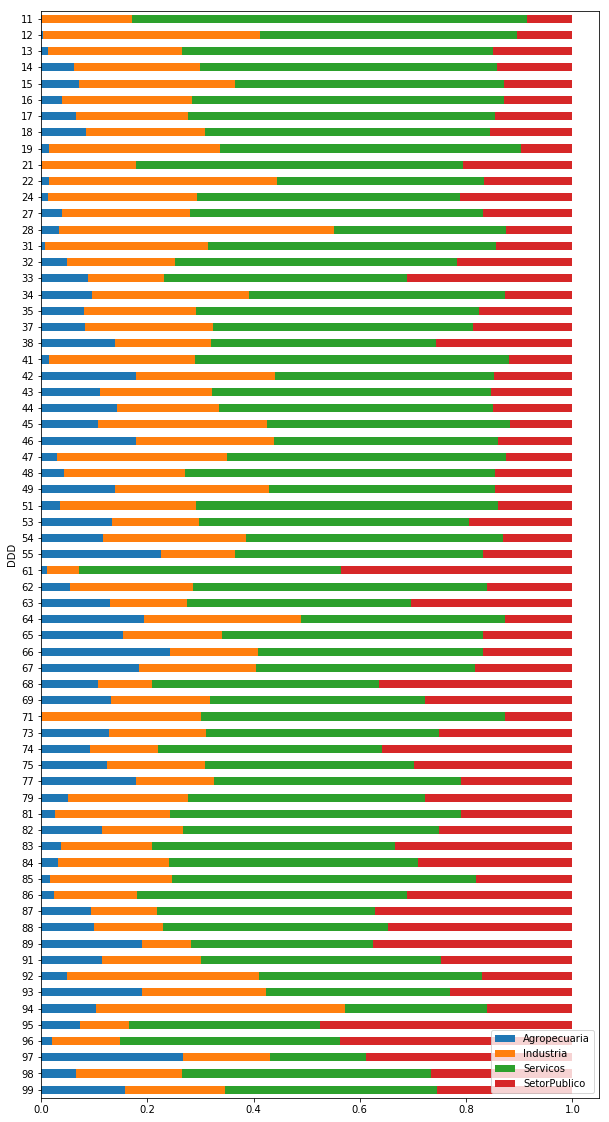

In [21]:
# mostrar o acumulado dos setores por DDD
rcParams['figure.figsize'] = 10, 20

plt.close()
ddd.loc[::-1,'Agropecuaria':'SetorPublico'].plot(kind='barh', stacked=True)

plt.show()

In [22]:
'''muito demorado esse pairplot
sns.set(style="ticks")
sns.pairplot(ddd)
plt.show()
'''

'muito demorado esse pairplot\nsns.set(style="ticks")\nsns.pairplot(ddd)\nplt.show()\n'

In [23]:
#agrupando pelo primeiro dígito do DDD
dddgroup = ddd.groupby(lambda v: str(v)[0:1] + 'X').sum()[['PIB','Populacao','%PIB','%Pop']]
dddgroup


,PIB,Populacao,%PIB,%Pop
1X,1.939890e+09,44396484,0.323542,0.217116
2X,7.795000e+08,20479935,0.130008,0.100155
3X,5.193264e+08,20869101,0.086615,0.102058
4X,6.260325e+08,17982208,0.104412,0.087940
5X,3.819851e+08,11247972,0.063709,0.055007
6X,6.586476e+08,19515135,0.109852,0.095437
7X,2.835793e+08,17447279,0.047296,0.085324
8X,4.864786e+08,32208969,0.081137,0.157514
9X,3.203473e+08,20335784,0.053429,0.099450


In [27]:
#agrupando pelo primeiro dígito do DDD e por CARRIER
dddgroup = ddd.groupby(lambda v: str(v)[0:1] + 'X').sum()[['PIB','Populacao','%PIB','%Pop']]
dddgroup


,PIB,Populacao,%PIB,%Pop
1X,1.939890e+09,44396484,0.323542,0.217116
2X,7.795000e+08,20479935,0.130008,0.100155
3X,5.193264e+08,20869101,0.086615,0.102058
4X,6.260325e+08,17982208,0.104412,0.087940
5X,3.819851e+08,11247972,0.063709,0.055007
6X,6.586476e+08,19515135,0.109852,0.095437
7X,2.835793e+08,17447279,0.047296,0.085324
8X,4.864786e+08,32208969,0.081137,0.157514
9X,3.203473e+08,20335784,0.053429,0.099450


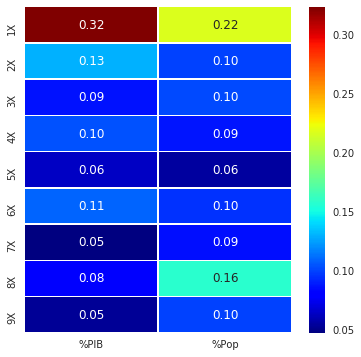

In [35]:
rcParams['figure.figsize'] = 6, 6
sns.set()

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(72, 100))
sns.heatmap(dddgroup[['%PIB','%Pop']], annot=True, fmt=".2f", linewidths=.5, cmap='jet')

plt.show()

In [36]:
#from matplotlib import cm
#imshow(perctot_pivot)
#print(cm.copper(255))

#TODOS: carregar base de acessos
acessos_smp = pd.read_csv('/home/christian.janiake/exploratory_data_analisys/Acessos_SMP_2015-2018_-_DDD.csv', sep=';', index_col=0, )
acessos_smp = acessos_smp.dropna()
acessos_smp.sum()


2015-01    281720401.0
2015-02    282577241.0
2015-03    283419797.0
2015-04    283538009.0
2015-05    284174248.0
2015-06    282474285.0
2015-07    281469851.0
2015-08    280042602.0
2015-09    275909142.0
2015-10    273816151.0
2015-11    269611265.0
2015-12    257814274.0
2016-01    257248050.0
2016-02    258062777.0
2016-03    257810656.0
2016-04    256429095.0
2016-05    255231677.0
2016-06    253407792.0
2016-07    252573841.0
2016-08    252081484.0
2016-09    251028412.0
2016-10    247453649.0
2016-11    248448143.0
2016-12    244067356.0
2017-01    243419579.0
2017-02    242918971.0
2017-03    242790294.0
2017-04    242335205.0
2017-05    242118177.0
2017-06    242124449.0
2017-07    242011349.0
2017-08    242167504.0
2017-09    241062955.0
2017-10    240850681.0
2017-11    239091782.0
2017-12    236488548.0
2018-01    236229884.0
2018-02    235655505.0
2018-03    235786195.0
dtype: float64

In [37]:
acessos_smp.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
DDD,,,,,,,,,,,,,,,,,,,,,
11.0,36734254.0,36903419.0,37013770.0,37095291.0,37156638.0,37114513.0,37000166.0,36912659.0,36429670.0,36399422.0,...,34478927.0,34615666.0,34765717.0,34758198.0,34861451.0,34768254.0,34636833.0,34646112.0,34769980.0,34947814.0
12.0,3758231.0,3763919.0,3761843.0,3776353.0,3773455.0,3765934.0,3731588.0,3706655.0,3648021.0,3617600.0,...,3193591.0,3194732.0,3185011.0,3157841.0,3188738.0,3161409.0,3118383.0,3110784.0,3102256.0,3086303.0
13.0,2817206.0,2846060.0,2860507.0,2867222.0,2889047.0,2881239.0,2867707.0,2855915.0,2811290.0,2805965.0,...,2580574.0,2586382.0,2583343.0,2566973.0,2560519.0,2532934.0,2525729.0,2516680.0,2510273.0,2501163.0
14.0,3112830.0,3122226.0,3123573.0,3122140.0,3119633.0,3104281.0,3091934.0,3064637.0,2996574.0,2974245.0,...,2754666.0,2754882.0,2754490.0,2746214.0,2743250.0,2741658.0,2739158.0,2733526.0,2715947.0,2714722.0
15.0,2667134.0,2677219.0,2689735.0,2706106.0,2707056.0,2689269.0,2669422.0,2654486.0,2591983.0,2593299.0,...,2254880.0,2262250.0,2269176.0,2272034.0,2273882.0,2272659.0,2268220.0,2258612.0,2254539.0,2271892.0


In [38]:
acessos_smpT = acessos_smp.T
acessos_smpT.index = pd.DatetimeIndex(acessos_smpT.index)
#acessos_smpT.resample('AS', convention='start').asfreq().head()
acessos_smp_year = acessos_smpT.resample('AS', convention='start').asfreq()
acessos_smp_year.head()

DDD,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,...,89.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
2015-01-01,36734254.0,3758231.0,2817206.0,3112830.0,2667134.0,4230595.0,3085546.0,2454424.0,9540158.0,19301698.0,...,1175077.0,6420447.0,3722889.0,1112411.0,1778465.0,509398.0,928702.0,444821.0,4341126.0,2302240.0
2016-01-01,34724091.0,3466672.0,2654195.0,2809808.0,2458721.0,3978510.0,2847431.0,2215773.0,9208194.0,17993379.0,...,1081040.0,5671799.0,3324586.0,1002747.0,1544815.0,479670.0,796991.0,397761.0,3972262.0,2085920.0
2017-01-01,34004668.0,3211005.0,2553916.0,2749792.0,2276295.0,3841237.0,2664302.0,2040875.0,8764401.0,17128933.0,...,1008354.0,5258703.0,3025362.0,903264.0,1433372.0,481545.0,727613.0,437646.0,3746288.0,2003624.0
2018-01-01,34646112.0,3110784.0,2516680.0,2733526.0,2258612.0,3715670.0,2627822.0,2002960.0,8674140.0,16239158.0,...,983404.0,5034401.0,3001565.0,879660.0,1348640.0,485642.0,708496.0,469606.0,3586640.0,1942635.0


In [39]:
acessos_smpT.resample('AS', convention='start').asfreq().index

DatetimeIndex(['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'], dtype='datetime64[ns]', freq='AS-JAN')

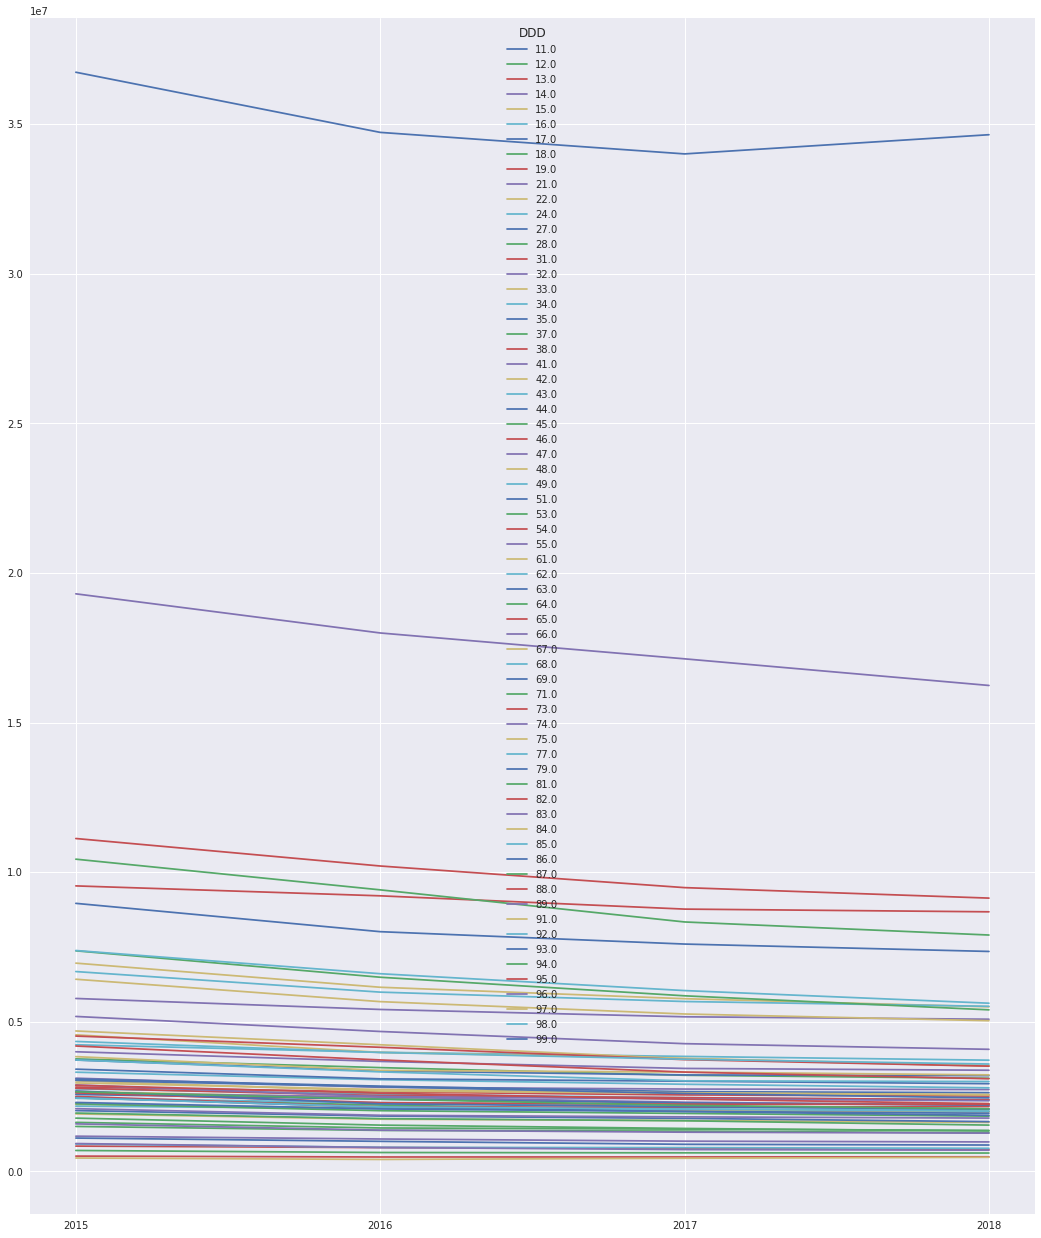

In [40]:
plt.close()
acessos_smp_year.plot(figsize=(18,22), legend='Acessos_SMP_2015-2018_-_DDD')
plt.show()

In [41]:
#acessos_smp_yearT = acessos_smp_year.T
dddgroup_access = acessos_smp_year.T.groupby(lambda v: str(v)[0:1] + 'X').sum()
dddgroup_access


,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00
1X,68400378.0,64363395.0,62106491.0,62286306.0
2X,29183378.0,26955804.0,25767682.0,24667632.0
3X,26853649.0,24559941.0,23290572.0,22594724.0
4X,24499272.0,22817883.0,21862828.0,21347345.0
5X,16567703.0,14806552.0,14167594.0,13648086.0
6X,29850200.0,26504828.0,25323160.0,24407104.0
7X,21536378.0,18857197.0,17609558.0,16564112.0
8X,43268944.0,39105899.0,35274277.0,33257290.0
9X,21560499.0,19276551.0,18017417.0,17457285.0


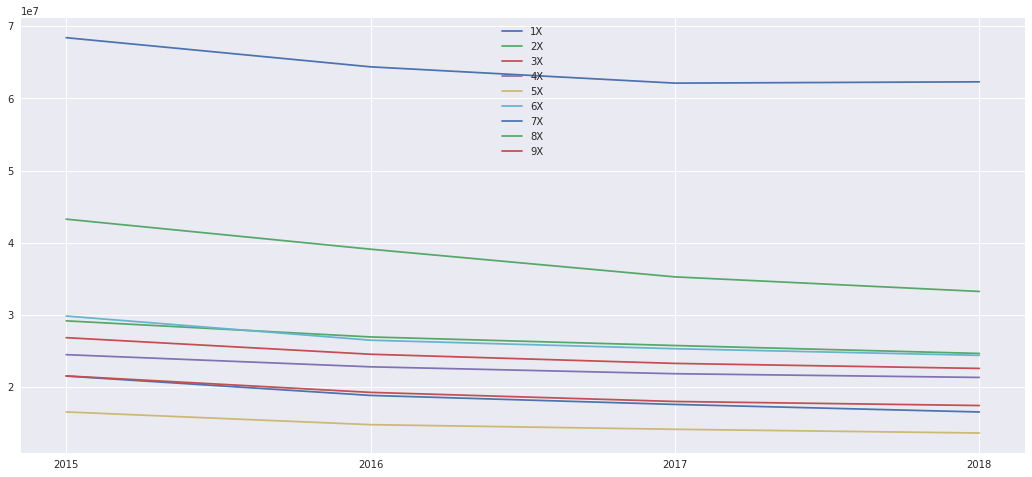

In [42]:
dddgroup_access.T.plot(figsize=(18,8))
plt.show()

In [43]:
dddgroup_access.iloc[:,-1:]
#dddgroup_access

,2018-01-01 00:00:00
1X,62286306.0
2X,24667632.0
3X,22594724.0
4X,21347345.0
5X,13648086.0
6X,24407104.0
7X,16564112.0
8X,33257290.0
9X,17457285.0


In [44]:
perctot_access = dddgroup_access.reset_index().groupby('index').sum().apply(lambda x: x / x.sum() * 100)
perctot_access.iloc[:,-1:]

,2018-01-01 00:00:00
index,
1X,26.366819
2X,10.442215
3X,9.564719
4X,9.036683
5X,5.777460
6X,10.331929
7X,7.011861
8X,14.078359
9X,7.389956


In [45]:
df_access_pib = dddgroup.loc[:,['%PIB','%Pop']] * 100
df_access_pib['%SMP'] = perctot_access[perctot_access.columns[-1]]
df_access_pib['2015/2010'] = perctot_access[perctot_access.columns[-1]] / perctot_access[perctot_access.columns[0]]
df_access_pib



,%PIB,%Pop,%SMP,2015/2010
1X,32.354219,21.711591,26.366819,1.085969
2X,13.000796,10.015477,10.442215,1.008034
3X,8.661521,10.205794,9.564719,1.003430
4X,10.441207,8.793993,9.036683,1.039140
5X,6.370892,5.500692,5.777460,0.982410
6X,10.985173,9.543653,10.331929,0.975107
7X,4.729643,8.532392,7.011861,0.917231
8X,8.113674,15.751427,14.078359,0.916630
9X,5.342874,9.944982,7.389956,0.965609


In [46]:
df_access_pib.corr()

,%PIB,%Pop,%SMP,2015/2010
%PIB,1.000000,0.815970,0.937891,0.783802
%Pop,0.815970,1.000000,0.961165,0.390564
%SMP,0.937891,0.961165,1.000000,0.574918
2015/2010,0.783802,0.390564,0.574918,1.000000


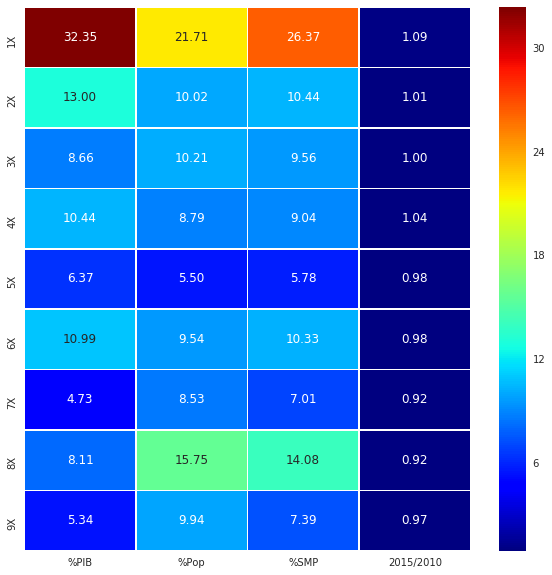

In [47]:
# here lets put together the access data on the 2015-2018 period
rcParams['figure.figsize'] = 10, 10
sns.set()

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(72, 100))

sns.heatmap(df_access_pib, annot=True, fmt=".2f", linewidths=.5, cmap='jet')
plt.show()

In [48]:
# OK, now i want to make a table like this one for each of the appIds:
ddd_stats = ddd.loc[:,'Agropecuaria':]
ddd_stats

,Agropecuaria,Industria,Servicos,SetorPublico,%PIB,%Pop,PerCapita
DDD,,,,,,,
11,0.002895,0.167542,0.743356,0.086207,0.191737,0.111602,50.375762
12,0.004331,0.407045,0.483699,0.104925,0.017085,0.011952,41.913913
13,0.012972,0.252533,0.584228,0.150268,0.011451,0.010120,33.177095
14,0.062583,0.236526,0.558825,0.142066,0.011399,0.011784,28.364879
15,0.071647,0.294254,0.504871,0.129228,0.011303,0.010029,33.046680
16,0.039164,0.244190,0.588639,0.128006,0.016516,0.014933,32.430759
17,0.066307,0.209517,0.578923,0.145254,0.009469,0.009789,28.362765
18,0.084743,0.223046,0.537888,0.154322,0.008440,0.009391,26.354576
19,0.015543,0.320795,0.566761,0.096901,0.046142,0.027516,49.169834
